# Table of contents
* [1. Data Cleaning Process](#1)
    * [1.1 Dataset information](#1.1)
    * [1.2 File/object size reduction with correct datatypes](#1.2)
* [2. Visualization](#2)
    * [2.1 Preparing data](#2.1)
    * [2.2 Plotting frecuency vs. day of the month](#2.2)
    * [2.3 Frecuency vs. daily hours](#2.3)
* [3. Cross Analysis. Heatmap: daily hour vs. week day](#3)
    * [3.1 Heatmap: daily hour vs. week day](#3.1)
    * [3.2 Heatmap: month vs. week day](#3.2)

We import the dependencies needed for manipulate dataframes and visualization

Important dependencies are:
* [Pandas](https://pandas.pydata.org) for their dataframe structures and easy visualization.
* [Matplotlib](https://matplotlib.org) for visualization.
* [Seaborn](https://seaborn.pydata.org/) for visualization.

In [1]:
# Import necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import glob

%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/uber-pickups-in-new-york-city/other-Highclass_B01717.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-American_B01362.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Firstclass_B01536.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Carmel_B00256.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Dial7_B00887.csv
/kaggle/input/uber-pickups-in-new-york-city/other-FHV-services_jan-aug-2015.csv
/kaggle/input/uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Lyft_B02510.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Diplo_B01196.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Federal_02216.csv
/kaggle/input/uber-pickups-i

# 1. Data Cleaning Process <a id="1"></a>

## 1.1 DataFrame information<a id="1.1"></a>

In [2]:
def list_file_names(x):
    '''This function return all the components of a list
    with the index'''
    i=0
    for name in x:
        print(name)
        i+=1

In [3]:
pattern = '../input/uber-pickups-in-new-york-city/uber?*.csv' # Write the pattern in order to find the uber... files

csv_files = glob.glob(pattern)# Save all file matches: list_file_names

print(list_file_names(csv_files))# Print the file names

../input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv
../input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv
../input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv
../input/uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv
../input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv
../input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv
../input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv
None


In [4]:
data_apr14 = '../input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv'
data_may14 = '../input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv'
data_jun14 = '../input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv'
data_jul14 = '../input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv'
data_aug14 = '../input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv'
data_sep14 = '../input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv'

list_data = [data_apr14,data_may14,data_jun14,data_jul14,data_aug14,data_sep14]

In [5]:
list_data

['../input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv',
 '../input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv',
 '../input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv',
 '../input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv',
 '../input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv',
 '../input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv']

In [6]:
%%time

frames = [pd.read_csv(csv) for csv in list_data]

uber = pd.concat(frames) # Concatenate frames into a single DataFrame

print(uber.head()) # Print the head of uber

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
CPU times: user 3.56 s, sys: 756 ms, total: 4.32 s
Wall time: 4.39 s


As we can see, the datasets are equal, they have the same columns with the same format. Now, we could start analyzing our datasets, but I would like to concatenate the frames into a single DataFrame.

In [7]:
print("Column names: ",uber.columns) # Print the column names of the DataFrame
print("Shape DataFrame: ",uber.shape) # Print the shape of uber
print(uber.info(memory_usage="deep"))

Column names:  Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')
Shape DataFrame:  (4534327, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 698.3 MB
None


Our goal right now is to reduce the loading time as well as the memory usage while the object is loaded.

In [8]:
# Show the memory usage in megabytes of every column
uber.memory_usage(deep=True) * 1e-6

Index         36.274616
Date/Time    337.697264
Lat           36.274616
Lon           36.274616
Base         285.662601
dtype: float64

In [9]:
uber.memory_usage(deep=True).sum() * 1e-6

732.183713

We can see that the Date/Time and Base columns take up the most space.

While 732 MB are not too large, this can easily grow to 10+GB with some column-combinations, text transformations and new objects.

## 1.2 File/object size reduction with correct datatypes<a id="1.2"></a>

One of the easiest ways to reduce sizes is by converting columns to the right datatype. Currently, only two columns use the object type, which is basically strings that are very memory-inefficent.

The column Date/Time is an object, but it would be better if this column works as a Timestamp. In that way we can access to more information

In [10]:
uber.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [11]:
print("size before:", uber['Date/Time'].memory_usage(deep=True) * 1e-6)
uber['Date/Time'] = pd.to_datetime(uber['Date/Time'])
print("size after: ", uber['Date/Time'].memory_usage(deep=True) * 1e-6)

size before: 373.97188
size after:  72.549232


In [12]:
print("size before:", uber['Base'].memory_usage(deep=True) * 1e-6)
uber['Base'] = uber['Base'].astype('category')
print("size after: ", uber['Base'].memory_usage(deep=True) * 1e-6)

size before: 321.937217
size after:  40.809418


As we can see, by converting columns to the right datatype we reduce the memory usage. Date/Time column size was reduced by 19% while the Base column was reduced by 13%.

In [13]:
print(uber.memory_usage(deep=True)*1e-6)
print("total:", uber.memory_usage(deep=True).sum()*1e-6)

Index        36.274616
Date/Time    36.274616
Lat          36.274616
Lon          36.274616
Base          4.534802
dtype: float64
total: 149.633266


In [14]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
Date/Time    datetime64[ns]
Lat          float64
Lon          float64
Base         category
dtypes: category(1), datetime64[ns](1), float64(2)
memory usage: 142.7 MB


After this file/object size reduction we went from:

memory usage: 698.3 MB 
memory usage: 182.7 MB


In [15]:
%%time
# For this visualization we need day of the week, day of the month, month and pickup hour.
dt = uber['Date/Time'] 

# Now, we need a couple of functions in order to select the desired information of the time stamp
def get_dom(dt):
    return dt.day

def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

def get_month(dt):
    import calendar
    month_name = calendar.month_name[dt.month]
    return month_name

uber['dom'] = uber['Date/Time'].map(get_dom)

uber["week_day"] = uber['Date/Time'].map(get_weekday)

uber['hour'] = uber['Date/Time'].map(get_hour)

uber['month'] = uber['Date/Time'].map(get_month)

CPU times: user 2min 42s, sys: 2.8 s, total: 2min 44s
Wall time: 2min 44s


In [16]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 8 columns):
Date/Time    datetime64[ns]
Lat          float64
Lon          float64
Base         category
dom          int64
week_day     int64
hour         int64
month        object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 281.1+ MB


In [17]:
uber['month'] = uber['month'].astype('category')

In [18]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 8 columns):
Date/Time    datetime64[ns]
Lat          float64
Lon          float64
Base         category
dom          int64
week_day     int64
hour         int64
month        category
dtypes: category(2), datetime64[ns](1), float64(2), int64(3)
memory usage: 250.8 MB


# 2. Visualization <a id="2"></a>

## 2.1 Preparing data <a id="2.1"></a>

In [19]:
list_month = uber.month.unique()
print(list_month)

[April, May, June, July, August, September]
Categories (6, object): [April, May, June, July, August, September]


In [20]:
list_data_per_month = [uber[uber.month == month] for month in list_month]

for ind in range(len(list_month)):
    print(list_data_per_month[ind].head())

            Date/Time      Lat      Lon    Base  dom  week_day  hour  month
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512    1         1     0  April
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512    1         1     0  April
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512    1         1     0  April
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512    1         1     0  April
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512    1         1     0  April
            Date/Time      Lat      Lon    Base  dom  week_day  hour month
0 2014-05-01 00:02:00  40.7521 -73.9914  B02512    1         3     0   May
1 2014-05-01 00:06:00  40.6965 -73.9715  B02512    1         3     0   May
2 2014-05-01 00:15:00  40.7464 -73.9838  B02512    1         3     0   May
3 2014-05-01 00:17:00  40.7463 -74.0011  B02512    1         3     0   May
4 2014-05-01 00:17:00  40.7594 -73.9734  B02512    1         3     0   May
            Date/Time      Lat      Lon    Base  dom  week_day  hour month
0 2014-06-01 00:00:

## 2.2 Plotting frecuency vs. day of the month<a id="2.2"></a>

In [21]:
def plot_hist(df_list,column_name,n_column,n_row,xlabel,ylabel,title):
    '''This function plot a group of histograms with n_columns and n_rows with a DataFrame and his column given'''
    i,j,k = 0,0,0
    colors = 'b g r m c y'.split(' ')
    
    fig, axes =plt.subplots(n_row,n_column,figsize=[30,10])

    # create a list of index in the form of axes[i,j]
    list_indx = [axes[i,j] for i in range(0,n_row) for j in range(0,n_column)]
    
    for df_month in df_list:
        df_month[column_name].plot.hist(ax = list_indx[k], bins = 30, rwidth = 0.5, range=(0.5,30.5),color=colors[k]) 
        # set labels 
        list_indx[k].set_xlabel(xlabel)
        list_indx[k].set_ylabel(ylabel)
        title_dig = 'Graph.{} - {} - uber trip {} 2014'.format((k+1),title,list_month[k])
        list_indx[k].set_title(title_dig)
        k+=1
        if k == 6:
            break
    ;

''

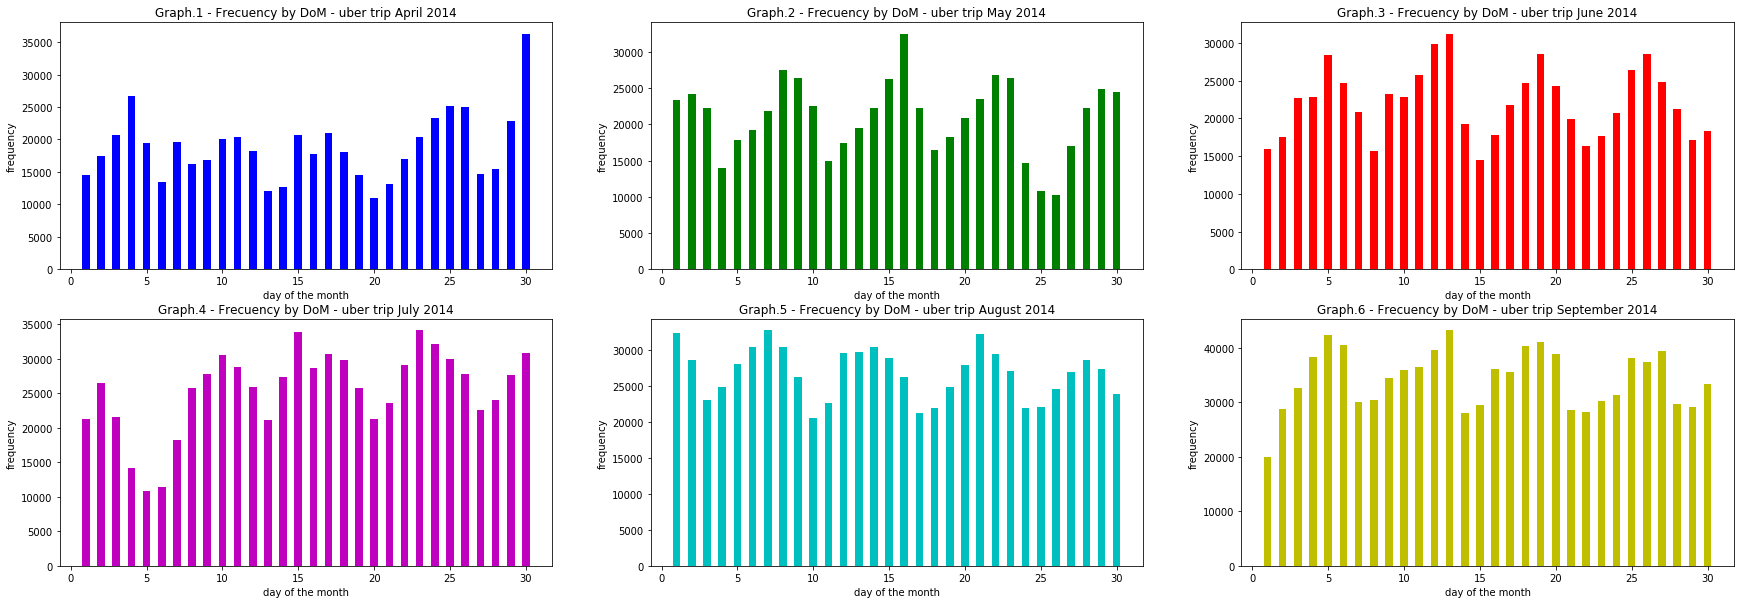

In [22]:
plot_hist(list_data_per_month,'dom',3,2,xlabel='day of the month',ylabel='frequency',title='Frecuency by DoM')
;

In the graphics is given more information on the frecuency of uber trips. We can see how the number of uber trips decreased during weekends. On the other hand, the peaks to the weekdays.

## 2.3 Frecuency vs. daily hours<a id="2.3"></a>

''

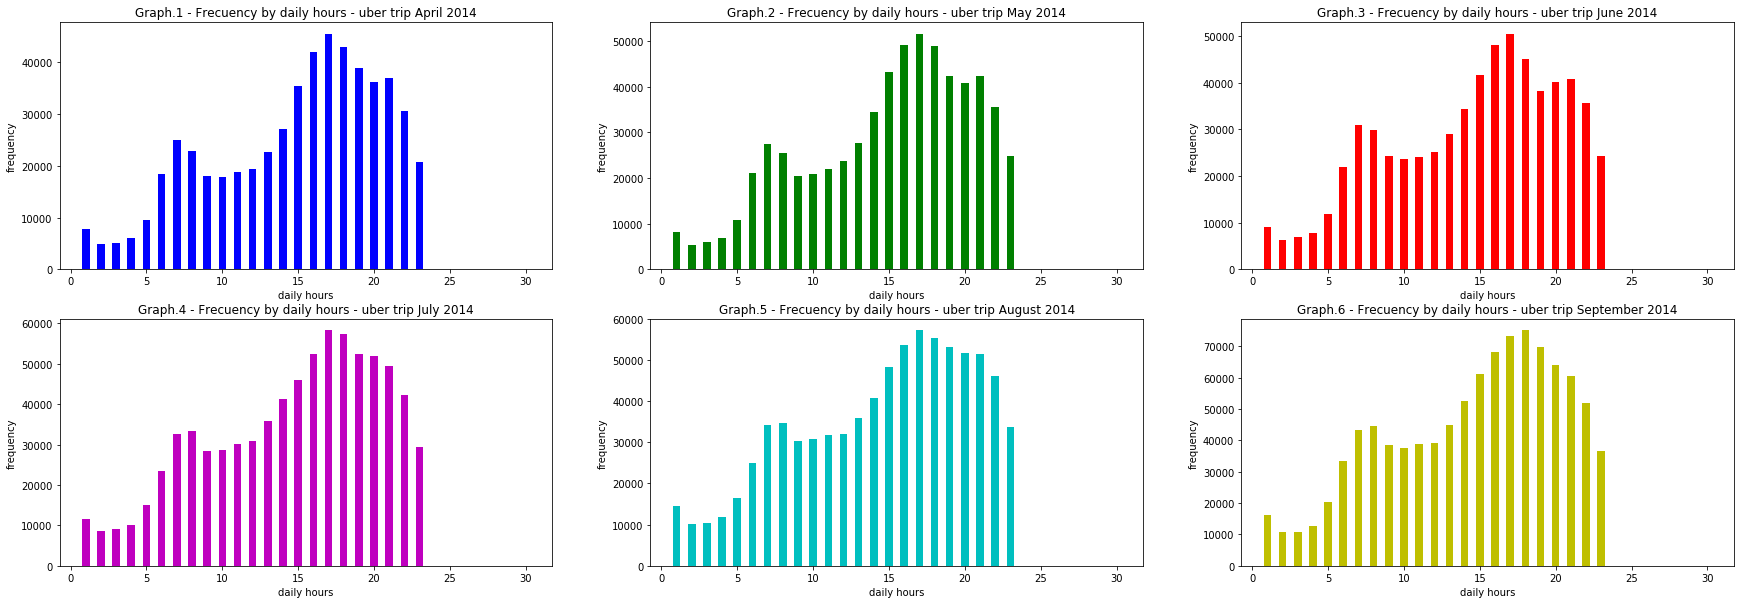

In [23]:
plot_hist(list_data_per_month,'hour',3,2,xlabel='daily hours',ylabel='frequency',title='Frecuency by daily hours')
;

As can be seen, on average, after 3 pm there is a high demand of uber cars.

# 3. Cross Analysis. <a id='3'></a>

## 3.1 Heatmap: daily hour vs. week day <a id='3.1'></a>

In [24]:
def plot_heatmap(df_list,column_names,n_column,n_row,title,length,height):
    '''This function plot a group of heatmaps with n_columns and n_rows with a DataFrame given'''
    n_column = 3
    n_row = 2
    i,j,k = 0,0,0
    colors = 'b g r m c y'.split(' ')
    
    #
    fig, axes =plt.subplots(n_row,n_column,figsize=[length,height])

    def count_rows(rows):
        return len(rows)

    by_cross_list = [mes.groupby(column_names.split(' ')).apply(count_rows).unstack() for mes in list_data_per_month]

    list_indx = [axes[i,j] for i in range(0,n_row) for j in range(0,n_column)] # create a list of index in the form of axes[i,j]

    for grafico in by_cross_list:
        #print(by_cross_list[k].head())
        sns.heatmap(grafico,ax =list_indx[k], cmap='rainbow', yticklabels='Mon Tue Wed Thu Fri Sat Sun'.split(' '))
        # set labels 
        title_dig = 'Graph.{} - {} - uber trip {} 2014'.format((k+1),title,list_month[k])    
        list_indx[k].set_title(title_dig)
        k+=1
        if k == 6:
            break
        ;

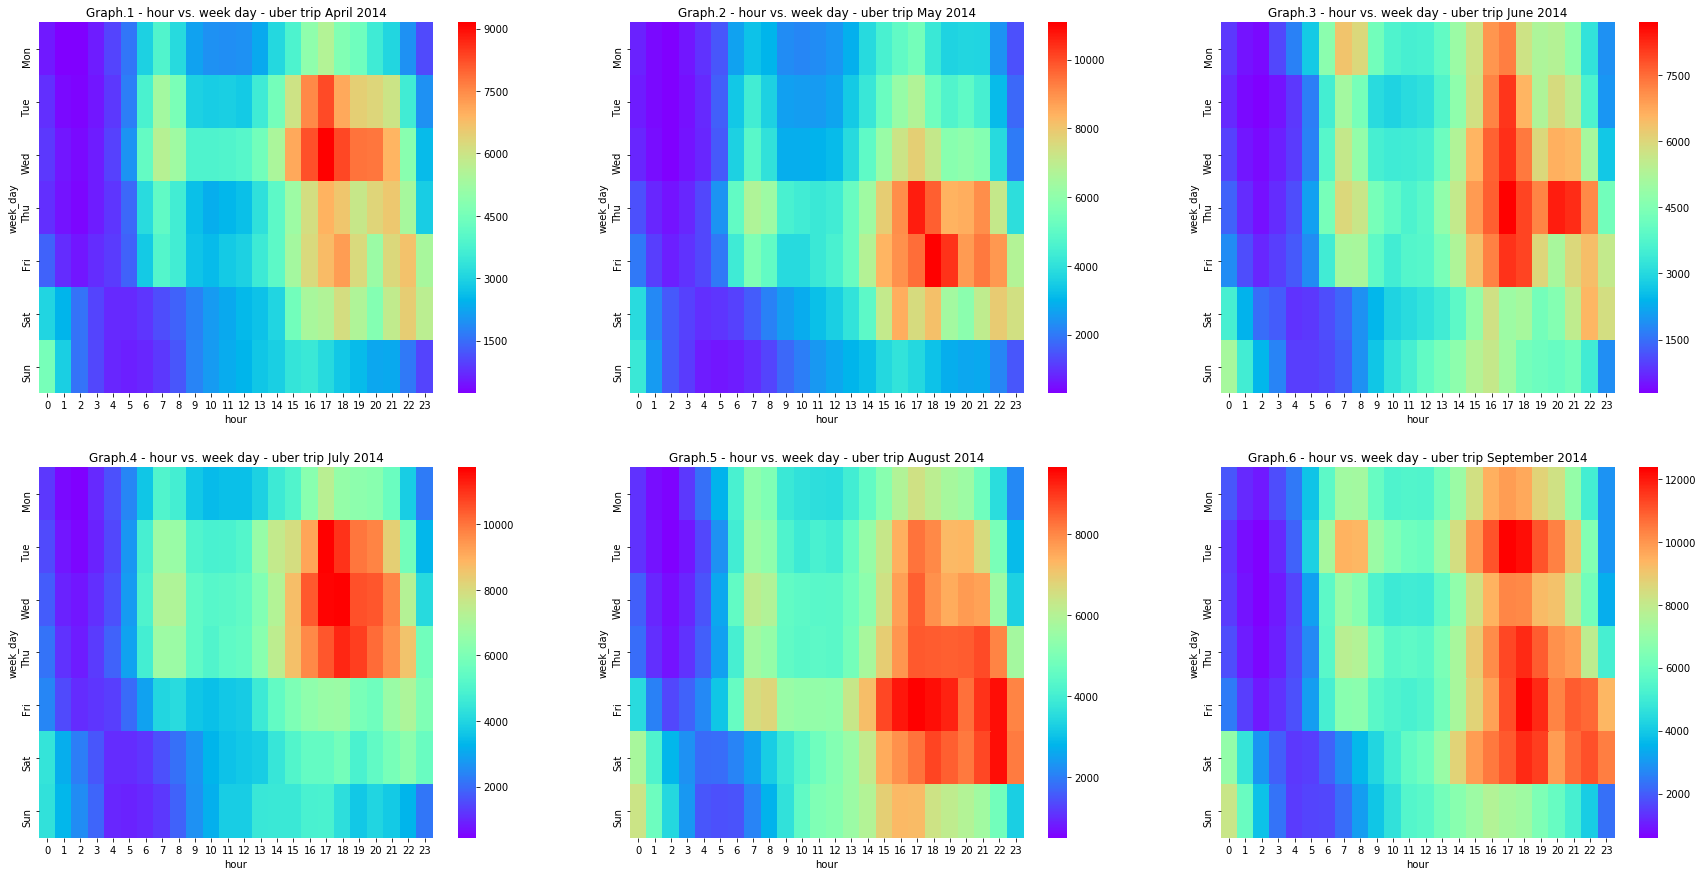

In [25]:
plot_heatmap(list_data_per_month,'week_day hour',3,2,title='hour vs. week day',length = 30,height = 15)

The graphs show how the frecuency vary throughout the day. The same pattern is observed, on weekdays the frecuency becomes noticeable from 6am, at this hour the people go to work or just leaving their homes. 

As can been observed, from Monday to Friday the frecuency is higher from 4pm untill 9pm at which time the frecuency starts to decrease. But if we take a look on Friday, the frecuency remains on highs untill 11pm and then starts to descend on early Saturday. The people just finished they jobs, go out for a drink or maybe for dinner. 

Over the weekend, the frecuency becomes noticeable at 11 am. On Saturday as well as on Friday, the frecuency is higher from 4pm but remains on highs untill early Sunday.

## 3.2 Heatmap: month vs. week day <a id='3.2'></a>

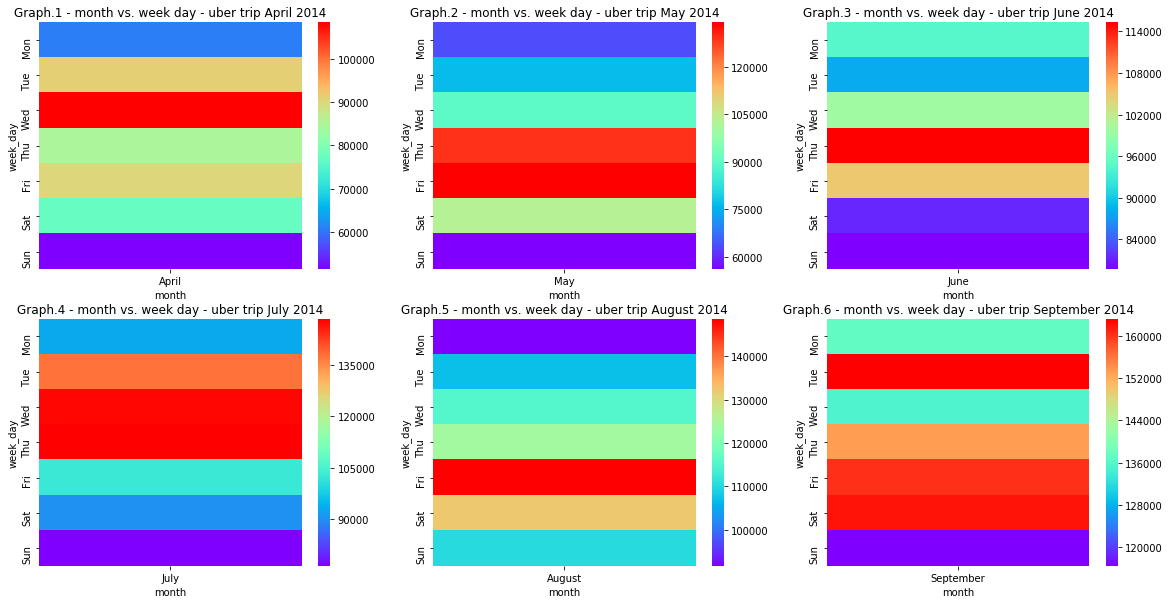

In [26]:
plot_heatmap(list_data_per_month,'week_day month',3,2,title='month vs. week day',length = 20,height = 10)

Text(0.5, 1.0, 'Graph.1 - month vs. week day - uber trip 2014')

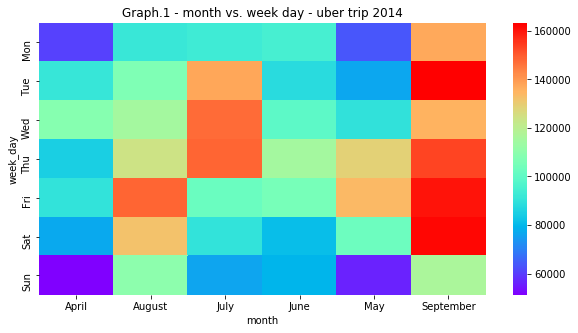

In [27]:
plt.subplots(figsize=[10,5])

def count_rows(rows):
    return len(rows)

by_cross = uber.groupby('week_day month'.split(' ')).apply(count_rows).unstack()

sns.heatmap(by_cross, cmap='rainbow', yticklabels='Mon Tue Wed Thu Fri Sat Sun'.split(' '))
# set labels 
plt.title('Graph.1 - month vs. week day - uber trip 2014')
